In [1]:
## Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#### Preprocessing

- Eliminar els asteriscos
- Juntar els punts que estan separats per un espai del final de la paraula

In [2]:
import re

def clean_text(text):
    # Replace all groups of asterisks with a single space
    text = re.sub(r"\*+", " ", text)
    
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    # Fix spacing before punctuation
    text = re.sub(r"\s+([.!?])", r"\1", text)
    
    return text


### ASHO SUMMARIES

In [3]:
asho_summaries = pd.read_json(r'C:\Users\xavim\Desktop\NLP project\NLP_project.json')

In [4]:
asho_summaries['Text'] = asho_summaries['Text'].apply(clean_text)
asho_summaries['Summary'] = asho_summaries['Summary'].apply(clean_text)


In [5]:
sorted_indices = asho_summaries['Summary'].str.len().sort_values(ascending=False)
text_with_summaries = sorted_indices[sorted_indices > 10]

In [6]:
text_with_summaries

12    1020
6     1015
5      876
7      859
4      793
13     658
9      215
8      166
10     130
11     103
Name: Summary, dtype: int64

In [7]:
asho_summaries_sorted = asho_summaries.iloc[sorted_indices.index]
train_data = asho_summaries.iloc[text_with_summaries.index]
train_data = train_data.reset_index(drop=True)

In [8]:
train_data

,Id,Summary,Text
0,1006079393,Paciente mujer de 80 años que ingresa proceden...,diagnostic alta codi icd-10 descripcio diagnos...
1,1006960152,Paciente que ingresa por hematemesis y pérdida...,diagnostic alta codi icd-10 descripcio diagnos...
2,1006962381,Paciente que ingresa por pérdida del conocimie...,diagnostic alta codi icd-10 descripcio diagnos...
3,1006956131,Paciente de edad avanzada e ingresos frecuente...,diagnostic alta codi icd-10 descripcio diagnos...
4,1006949703,Paciente que ingresa por deterioro de estado g...,diagnostic alta codi icd-10 descripcio diagnos...
5,1006075221,Paciente varón de 79 años que ingresa proceden...,diagnostic alta codi icd-10 descripcio diagnos...
6,1006079393,Estudio de muestra histológica procedente de i...,"servicio anatomia patologica , dr/dra: muestra..."
7,1006568506,Paciente con ingreso programado para coronario...,diagnostic alta codi icd-10 descripcio diagnos...
8,1006079393,Exámen de muestra histológica de intestino del...,"servicio anatomia patologica , dr/dra: muestra..."
9,1006076158,Estudio celular de líquido ascitico que muestr...,"servicio anatomia patologica , dr/dra: muestra..."


In [9]:
train_data['Text'][0]

"diagnostic alta codi icd-10 descripcio diagnostic i50.1/2 insuficiencia cardiaca esquerra dades informe motivo de ingreso mujer de 80 años que ingresa por disnea. antecedentes personales: alergia a contrastes yodados. - hta en tratamiento farmacologico. - dm tipo 2 en tratamiento con insulina - fa paroxistica anticoagulada con acod y en estratetgia de control de ritmo con amiodarona. - cirrosis hepatica secundaria a vhc. trasplante hepatico en 2009. controlada por aparato digestivo (dr castellote). trasplante hepatico en 2009. octubre 2012, se retira advagraf (tacrolimus) -por nefrotoxicidad y se mantiene micofenolato. - nefropatia diabetica y nefropatia por iga. transplante renal en 2013. en tractamiento inmunosupresor con ciclosporina y micofenolato. control en ccee de nfr. actualmente en tratamiento inmunosupresor con rapamune 1mg/dia. - varios episodios de pielonefritis del injerto renal. ultimo ingreso sep/15 por pielonefritis aguda por e. coli blee. tratamiento conertapenem 1 g/

In [10]:
import nltk
text = train_data['Text'][1]
summary = train_data['Summary'][1]

text_token = nltk.word_tokenize(text)
summary_token = nltk.word_tokenize(summary)

In [11]:
text

"diagnostic alta codi icd-10 descripcio diagnostic k92.2/1 hemorragia digestiva alta i85.01 varices esofagiques, amb hemorragia dades informe motivo de consulta paciente varon de 64, no amc, que consulta por vomitos en poso de cafe. antecedentes patologicos - trastorno dependencia enolica &gt; 10 ube/ dia - hiperreactividad bronquial - hta. - neumonia comunitaria no complicada hace mas de 20 años. - probable escabiosis/autoeccematizacio diagnosticada en febrero 17 tratada con corticoterapia topica. - insuficiencia renal cronica estadio ii-iiia (fg 40-60). no valorada por nefrologia. - cirrosis hepatica de etiologia enolica child-pugh a. profilaxis primaria para la hemorragia por hipertension portal con carvedilol. (fgs 2020: ve grandes sin signos de riesgo). ultima ecografia abdominal 02/23: muestra porta permeable sin liquido ascitico ni loes hepaticas. en seguimiento por digestivo (dra. martin) no descompensaciones previas. - masa testicular izquierda en estudio por urologia. ecograf

In [12]:
text_token

['diagnostic',
 'alta',
 'codi',
 'icd-10',
 'descripcio',
 'diagnostic',
 'k92.2/1',
 'hemorragia',
 'digestiva',
 'alta',
 'i85.01',
 'varices',
 'esofagiques',
 ',',
 'amb',
 'hemorragia',
 'dades',
 'informe',
 'motivo',
 'de',
 'consulta',
 'paciente',
 'varon',
 'de',
 '64',
 ',',
 'no',
 'amc',
 ',',
 'que',
 'consulta',
 'por',
 'vomitos',
 'en',
 'poso',
 'de',
 'cafe',
 '.',
 'antecedentes',
 'patologicos',
 '-',
 'trastorno',
 'dependencia',
 'enolica',
 '&',
 'gt',
 ';',
 '10',
 'ube/',
 'dia',
 '-',
 'hiperreactividad',
 'bronquial',
 '-',
 'hta',
 '.',
 '-',
 'neumonia',
 'comunitaria',
 'no',
 'complicada',
 'hace',
 'mas',
 'de',
 '20',
 'años',
 '.',
 '-',
 'probable',
 'escabiosis/autoeccematizacio',
 'diagnosticada',
 'en',
 'febrero',
 '17',
 'tratada',
 'con',
 'corticoterapia',
 'topica',
 '.',
 '-',
 'insuficiencia',
 'renal',
 'cronica',
 'estadio',
 'ii-iiia',
 '(',
 'fg',
 '40-60',
 ')',
 '.',
 'no',
 'valorada',
 'por',
 'nefrologia',
 '.',
 '-',
 'cirrosis',

In [13]:
text

"diagnostic alta codi icd-10 descripcio diagnostic k92.2/1 hemorragia digestiva alta i85.01 varices esofagiques, amb hemorragia dades informe motivo de consulta paciente varon de 64, no amc, que consulta por vomitos en poso de cafe. antecedentes patologicos - trastorno dependencia enolica &gt; 10 ube/ dia - hiperreactividad bronquial - hta. - neumonia comunitaria no complicada hace mas de 20 años. - probable escabiosis/autoeccematizacio diagnosticada en febrero 17 tratada con corticoterapia topica. - insuficiencia renal cronica estadio ii-iiia (fg 40-60). no valorada por nefrologia. - cirrosis hepatica de etiologia enolica child-pugh a. profilaxis primaria para la hemorragia por hipertension portal con carvedilol. (fgs 2020: ve grandes sin signos de riesgo). ultima ecografia abdominal 02/23: muestra porta permeable sin liquido ascitico ni loes hepaticas. en seguimiento por digestivo (dra. martin) no descompensaciones previas. - masa testicular izquierda en estudio por urologia. ecograf

In [14]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('spanish'))

def remove_stopwords(text, stopwords=stopwords):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords]
    return ' '.join(tokens)

train_data['Text'] = train_data['Text'].apply(remove_stopwords, stopwords=stopwords)

train_data['Summary'] = train_data['Summary'].apply(remove_stopwords, stopwords=stopwords)

In [15]:
text = train_data['Text'][1]
summary = train_data['Summary'][1]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform([train_data['Text'][0], train_data['Summary'][0]])
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

0.13100308158753265

In [17]:
prova = """Paciente varón de 58 años con antecedentes de trastorno de dependencia al alcohol, hiperlipidemia, hipertensión arterial, neumonía comunitaria, cirugía, neoplasia de mama, colecistectomía, entre otros. Ingresó por vómitos en contexto deglución. Presentaba vómitos autol, náuseas, fiebre, disnea, síndrome confus

Durante su estancia en mi hospital, experimentó una buena evolución favorable, permaneciendo afebril, resolviendose el dolor y siendo dado deambular. Se retiró laxante y paso a vía oral. Los análisis mostraron una leve elevación de
En el tercer trimestre se evidenfermedad cerebrovascular, objetivando hiponatremia, erc estadio 4 probablemente secundarias a cambios inflamatorios. El diagnóstico orientativo de infarto agudo
El paciente evolucionó favorablemente tras el tratamiento deplectivo, manteniendo una adecuada adherencia al tratamiento antibiótico y
Se trasladó a unidad de patología neuromuscular para continuar estudios de cirugía vascular, donde se establecieron pautas de tratamiento y digoxina, metasedimetasona, insulina, sertralina, metamizumab, foster
Al alta se ajustó su tratamiento, retirando la pauta de insulina Lantomepron, venoclips, bromuromicina, metoclopramida, mycostatin, atrovent nebul
La paciente fue capaz de una reunión con el equipo de atención primaria y especialistas endocrinología e infectología, identificando problemas de salud que requerían un manejo integral y un tratamiento multidisciplinario. La impresión diagnóstica
Tras el diagnóstico de infección por COVID-procedentes de enfermedades infecciosas,se decidió iniciar tratamiento consistió en domicilio y recibir indicaciones claras para el manejo de su condición de manera de acuerdo con sus facultativos en sus
Este resumen destaca los eventos clave en detallado el caso clínico
Paciente masculino de 77 años que ingresó por
Una historia clínica de múltiples comorbilidad que afectaba múltiples condiciones médicas crónicas, como EPOCAIT causat por adenocarcinoma irresectomía metabólico disematoso
 Además, hallazgos engrosamientos
Sindrome ansioso"""


predicted_text = remove_stopwords(prova, stopwords=stopwords)

In [18]:
predicted_text

'Paciente varón 58 años antecedentes trastorno dependencia alcohol , hiperlipidemia , hipertensión arterial , neumonía comunitaria , cirugía , neoplasia mama , colecistectomía , . Ingresó vómitos contexto deglución . Presentaba vómitos autol , náuseas , fiebre , disnea , síndrome confus estancia hospital , experimentó buena evolución favorable , permaneciendo afebril , resolviendose dolor siendo dado deambular . retiró laxante paso vía oral . análisis mostraron leve elevación tercer trimestre evidenfermedad cerebrovascular , objetivando hiponatremia , erc estadio 4 probablemente secundarias cambios inflamatorios . diagnóstico orientativo infarto agudo paciente evolucionó favorablemente tras tratamiento deplectivo , manteniendo adecuada adherencia tratamiento antibiótico trasladó unidad patología neuromuscular continuar estudios cirugía vascular , establecieron pautas tratamiento digoxina , metasedimetasona , insulina , sertralina , metamizumab , foster alta ajustó tratamiento , retiran

In [19]:
import spacy
word2vec = spacy.load('en_core_web_sm')

In [20]:
txt = word2vec(text)

sent1 = word2vec(summary)
sent2 = word2vec(predicted_text)

similarity = sent1.similarity(sent2)
similarity2 = sent1.similarity(txt)
similarity3 = sent2.similarity(txt)

print(similarity, similarity2, similarity3)

0.9543169674954517 0.9256480468282452 0.9028793568361434


C:\Users\xavim\AppData\Local\Temp\ipykernel_16968\42104694.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = sent1.similarity(sent2)
C:\Users\xavim\AppData\Local\Temp\ipykernel_16968\42104694.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can a

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform([summary, predicted_text])
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

0.10371067386864069

[0.13100308158753265, 0.1285269508598975, 0.14675843491202195, 0.12558087064292936, 0.11440985265254486, 0.20355873941340802, 0.08155628194067321, 0.09957685918829998, 0.047495558815275576, 0.09747262509920113]


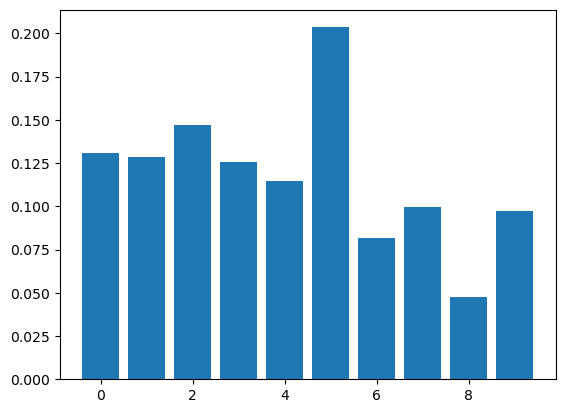

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


vectorizer = TfidfVectorizer()

# do it for all
cosine_similarities = []

for i in range(len(train_data)):
    tfidf_matrix = vectorizer.fit_transform([train_data['Text'][i], train_data['Summary'][i]])
    cosine_similarities.append(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0])

print(cosine_similarities)

plt.bar(range(len(cosine_similarities)), cosine_similarities)
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

count_matrix = vectorizer.fit_transform([summary, predicted_text])
cosine_similarity(count_matrix[0:1], count_matrix[1:2])[0][0]


0.1809561651596761

[0.21099802865973794, 0.20522769133562777, 0.23326502014993883, 0.20445959016024434, 0.18134828181801366, 0.3114840598909106, 0.1456985592771548, 0.1670382761952652, 0.08856148855400953, 0.16865480854231357]


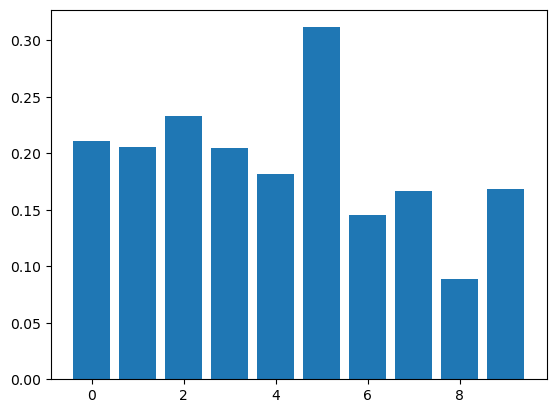

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

vectorizer = CountVectorizer()

cosine_similarities = []

for i in range(len(train_data)):
    count_matrix = vectorizer.fit_transform([train_data['Text'][i], train_data['Summary'][i]])
    cosine_similarities.append(cosine_similarity(count_matrix[0:1], count_matrix[1:2])[0][0])

print(cosine_similarities)

plt.bar(range(len(cosine_similarities)), cosine_similarities)
plt.show()

Histogram similarity between summary and text: 0.13976377952755906


<BarContainer object of 239 artists>

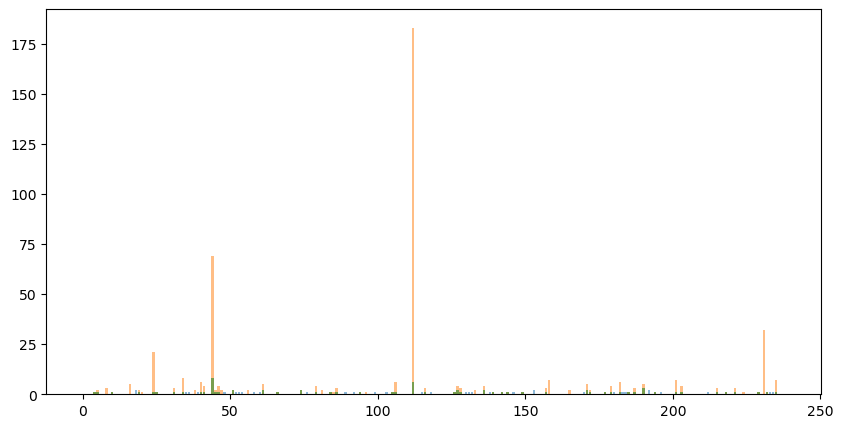

In [25]:
import numpy as np

#text = train_data['Text'][0]
#summary = train_data['Summary'][0]


# Tokenize text and summary
text_tokens = nltk.word_tokenize(summary)
summary_tokens = nltk.word_tokenize(predicted_text)

# Compute unique words in text and summary
unique_words_text = set(text_tokens)
unique_words_summary = set(summary_tokens)

all_unique_words = unique_words_summary.union(unique_words_text)

# Create histograms
hist_summary = np.array([summary.lower().count(word) for word in all_unique_words])
hist_text = np.array([text.lower().count(word) for word in all_unique_words])

# Compute histogram intersection
intersection = np.minimum(hist_summary, hist_text)
intersection_sum = np.sum(intersection)

# Compute histogram lengths
length_summary = np.sum(hist_summary)
length_text = np.sum(hist_text)

# Compute histogram similarity (intersection over union)
similarity = intersection_sum / (length_summary + length_text - intersection_sum)

print("Histogram similarity between summary and text:", similarity)

#plot the 3 histograms

plt.figure(figsize=(10, 5))

plt.bar(range(len(all_unique_words)), hist_summary, alpha=0.5, label='Summary')
plt.bar(range(len(all_unique_words)), hist_text, alpha=0.5, label='Text')
plt.bar(range(len(all_unique_words)), intersection, alpha=0.5, label='Intersection')



Histogram similarity between summary and text: 0.11224489795918367


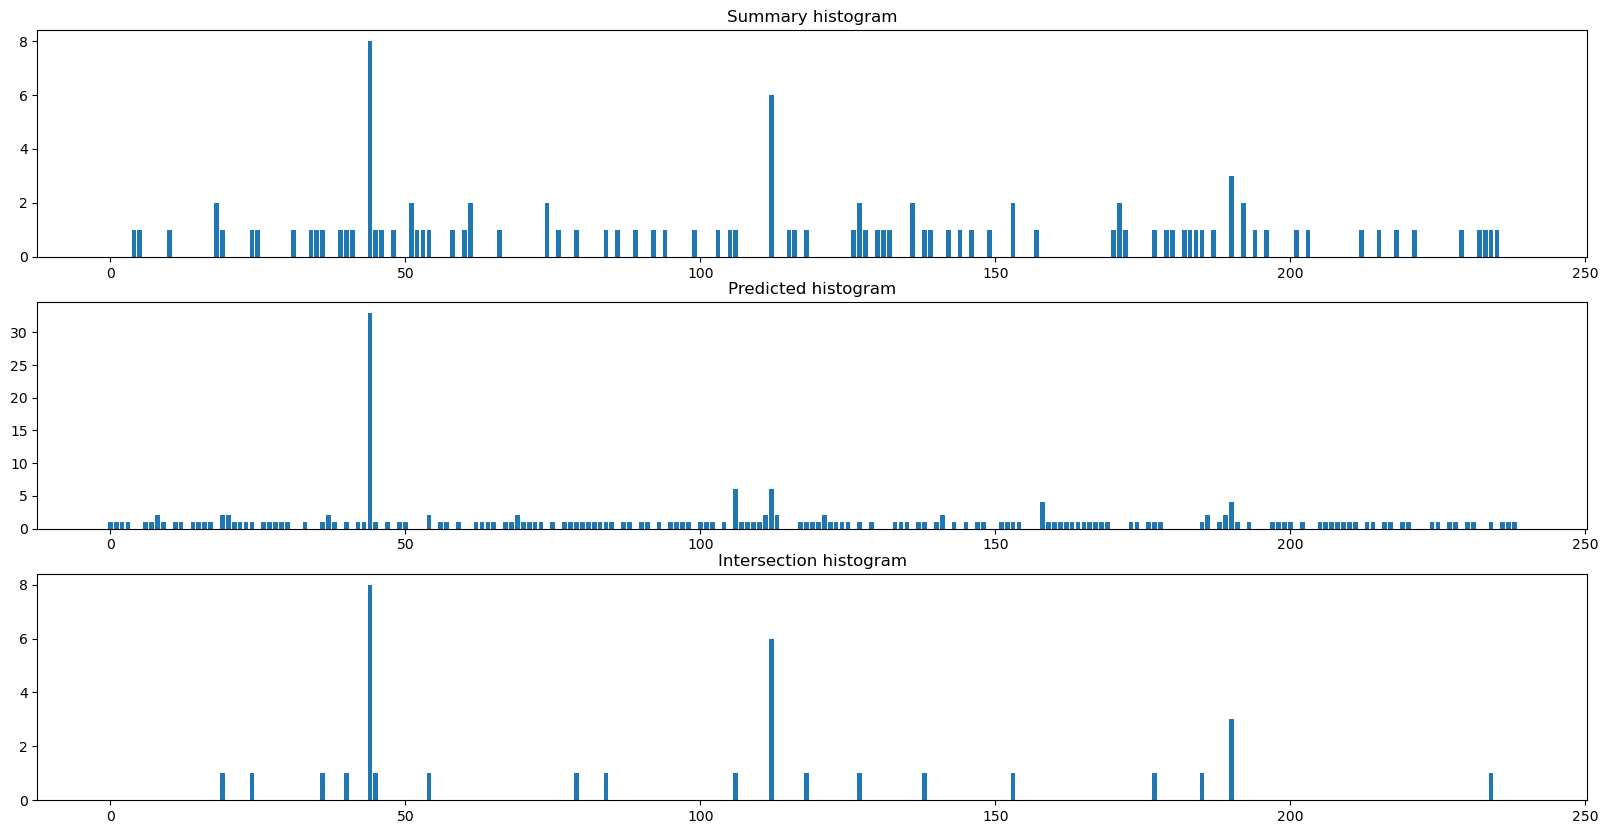

In [26]:
import numpy as np

#text = train_data['Text'][0]
#summary = train_data['Summary'][0]


# Tokenize text and summary
summ = nltk.word_tokenize(summary)
predicted = nltk.word_tokenize(predicted_text)

# Compute unique words in text and summary
unique_words_summ = set(summ)
unique_words_predicted = set(predicted)

all_unique_words = unique_words_predicted.union(unique_words_summ)

# Create histograms
hist_summ = np.array([summary.lower().count(word) for word in all_unique_words])
hist_predicted = np.array([predicted_text.lower().count(word) for word in all_unique_words])

# Compute histogram intersection
intersection = np.minimum(hist_summ, hist_predicted)
intersection_sum = np.sum(intersection)

# Compute histogram lengths
length_summ = np.sum(hist_summ)
length_predicted = np.sum(hist_predicted)

# Compute histogram similarity (intersection over union)
similarity = intersection_sum / (length_summ + length_predicted - intersection_sum)

print("Histogram similarity between summary and text:", similarity)

#plot the 3 histograms in different figures
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.bar(range(len(hist_summ)), hist_summ)
plt.title("Summary histogram")
plt.subplot(3, 1, 2)
plt.bar(range(len(hist_predicted)), hist_predicted)
plt.title("Predicted histogram")
plt.subplot(3, 1, 3)
plt.bar(range(len(intersection)), intersection)
plt.title("Intersection histogram")
plt.show()

In [27]:
# compute rouge score
from rouge import Rouge

rouge = Rouge()

scores = rouge.get_scores(predicted_text, summary)
print(scores)


import sacrebleu

bleu = sacrebleu.corpus_bleu([predicted_text], [[summary]])

print(bleu)


[{'rouge-1': {'r': 0.15294117647058825, 'p': 0.0783132530120482, 'f': 0.10358565289122415}, 'rouge-2': {'r': 0.04081632653061224, 'p': 0.018957345971563982, 'f': 0.02588996330620824}, 'rouge-l': {'r': 0.1411764705882353, 'p': 0.07228915662650602, 'f': 0.0956175254011843}}]
BLEU = 1.77 12.4/1.8/0.9/0.5 (BP = 1.000 ratio = 2.037 hyp_len = 218 ref_len = 107)
